In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.site_models import (
    ScheduledDowntimeData,
    UnscheduledDowntimeData,
    SeeingData,
    SeeingModel,
    CloudData,
    Almanac,
)
from astropy.time import Time
from rubin_sim.utils import (
    _ra_dec2_hpid,
    Site,
    calc_lmst_last,
    m5_flat_sed,
    _approx_ra_dec2_alt_az,
    _angular_separation,
    _approx_altaz2pa,
    survey_start_mjd,
)
from astropy import units as u

In [2]:
mjd_start = survey_start_mjd()
mjd_start_time = Time(mjd_start, format="mjd")

cloud_limit=0.3
almanac = Almanac(mjd_start=mjd_start)

mjds = np.arange(mjd_start, mjd_start+365.25, 1/24/60.*40)

sun_moon_info = almanac.get_sun_moon_positions(mjds)
good = np.where(sun_moon_info['sun_alt'] < np.radians(-18.))[0]


times = Time(mjds[good], format='mjd')



In [32]:
clouded_fracs = []

offsets = np.arange(0, 160, 1)

for cloud_offset_year in offsets:

    cloud_data = CloudData(
                    mjd_start_time, cloud_db='clouds.db', offset_year=cloud_offset_year,
                )
    
    bulk_cloud = cloud_data(times)
    clouded_fracs.append(np.where(bulk_cloud > cloud_limit)[0].size/bulk_cloud.size)
    
    

In [33]:
clouded_fracs

[0.2525597269624573,
 0.26199558321622163,
 0.14675767918088736,
 0.1806866091146356,
 0.23208191126279865,
 0.1859064444890584,
 0.2033728167034732,
 0.2375025095362377,
 0.38486247741417384,
 0.2375025095362377,
 0.2063842601887171,
 0.2718329652680185,
 0.19112627986348124,
 0.17265609315398514,
 0.23429030315197752,
 0.11343103794418792,
 0.20256976510740815,
 0.26621160409556316,
 0.2670146556916282,
 0.33708090744830355,
 0.2605902429231078,
 0.26841999598474203,
 0.26661312989359565,
 0.2459345512949207,
 0.24031319012246538,
 0.19253162015659506,
 0.40694639630596263,
 0.19955832162216422,
 0.19032322826741618,
 0.2248544468982132,
 0.22927123067657096,
 0.23248343706083116,
 0.33708090744830355,
 0.24774141738606706,
 0.2196346115237904,
 0.1845011041959446,
 0.2660108411965469,
 0.33447098976109213,
 0.24292310780967677,
 0.24994980927524593,
 0.2565749849427826,
 0.37341899217024693,
 0.18711102188315598,
 0.2698253362778559,
 0.34049387673158,
 0.3041557920096366,
 0.159606

Text(0, 0.5, 'Cloudy fraction')

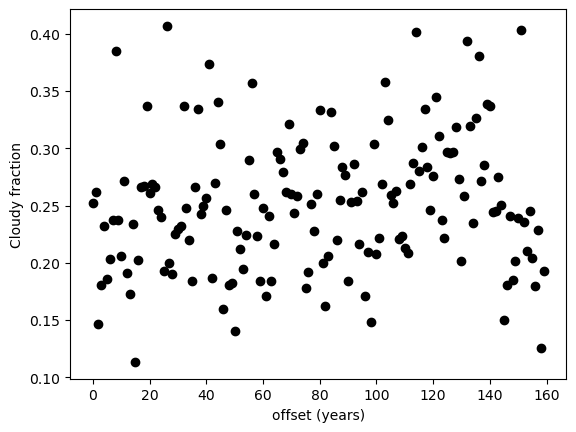

In [4]:
plt.plot(offsets , clouded_fracs, 'ko')
plt.xlabel('offset (years)')
plt.ylabel('Cloudy fraction')

Text(0, 0.5, 'Cloudy fraction')

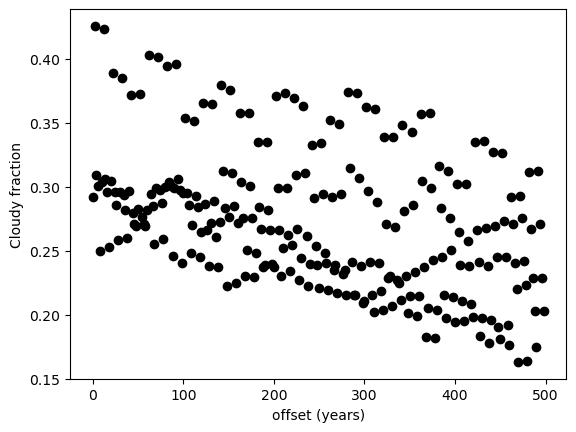

In [5]:
clouded_fracs = []

offsets = np.arange(0, 500, 2)

for cloud_offset_year in offsets:

    cloud_data = CloudData(
                    mjd_start_time, cloud_db=None, offset_year=cloud_offset_year,
                )
    
    bulk_cloud = cloud_data(times)
    clouded_fracs.append(np.where(bulk_cloud > cloud_limit)[0].size/bulk_cloud.size)
    


plt.plot(offsets , clouded_fracs, 'ko')
plt.xlabel('offset (years)')
plt.ylabel('Cloudy fraction')

Text(0.5, 1.0, 'Why are we not perfectly aliased at 20 years?')

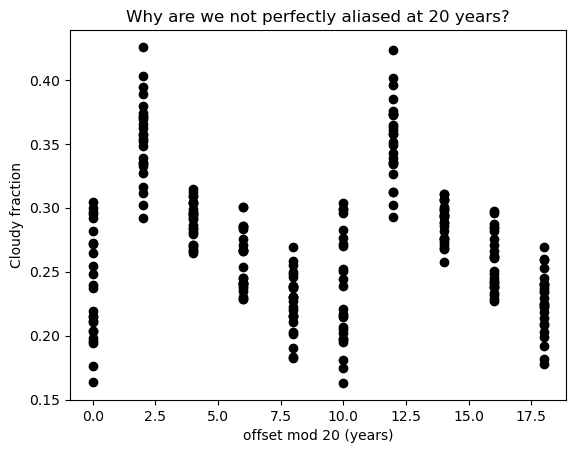

In [6]:
plt.plot(offsets % 20, clouded_fracs, 'ko')
plt.xlabel('offset mod 20 (years)')
plt.ylabel('Cloudy fraction')
plt.title('Why are we not perfectly aliased at 20 years?')

In [7]:
#plt.plot(offsets % 1200, clouded_fracs, 'ko')

In [8]:
cloud_data.time_range/3600/24/365.25

19.984342250361244

In [9]:
cloud_data(times[440:450])

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
       0.125])

In [10]:
cloud_data(times[440:450] + cloud_data.time_range*3*u.second)

/Users/yoachim/anaconda3/envs/rubin/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 10 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
       0.125])

In [11]:
np.where(bulk_cloud > 0)

(array([  39,   40,   41, ..., 4978, 4979, 4980]),)

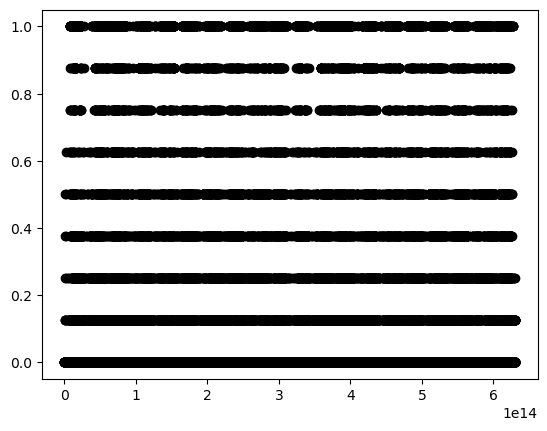

In [12]:
plt.plot(cloud_data.cloud_dates, cloud_data.cloud_values, 'ko')

In [13]:
offsets

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206,
       208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232,
       234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258,
       260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284,
       286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310,
       312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336,
       338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 36

In [14]:
cloud_data.time_range

630657879.0

(0.0, 1.0)

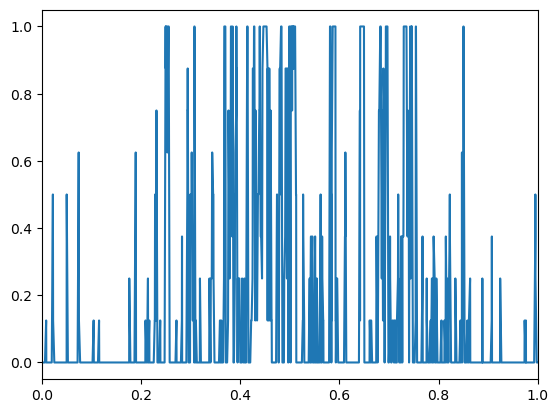

In [15]:
plt.plot(cloud_data.cloud_dates/3600/24/365/1e6, cloud_data.cloud_values)
plt.xlim([0,1])


In [16]:
x = cloud_data.cloud_dates/3600/24/365/1e6

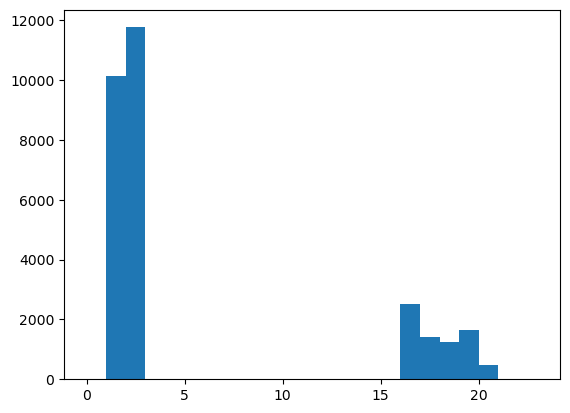

In [17]:
_ack = plt.hist(np.diff(x*365*24), bins=np.arange(24))

In [18]:
# ok, so are we sure we're not sometimes getting stuck interpolating to values on the log edges a bunch?

In [19]:
x[1000:1020]*365*24

array([5983.9775    , 6001.3675    , 6003.56416667, 6005.76111111,
       6007.95777778, 6025.37583333, 6027.56305556, 6029.75055556,
       6031.93777778, 6049.38416667, 6051.56194444, 6053.74      ,
       6055.91777778, 6073.39277778, 6075.56111111, 6077.72944444,
       6079.89777778, 6097.40111111, 6099.56      , 6101.71861111])

In [20]:
cloud_data.cloud_values

array([0., 0., 0., ..., 0., 0., 0.])

In [21]:
mjds

array([60218.        , 60218.02777778, 60218.05555556, ...,
       60583.16666671, 60583.19444449, 60583.22222226])

In [22]:
cloud_data0 = CloudData(
                    mjd_start_time, cloud_db=None, offset_year=0,
                )
cloud_data20 = CloudData(
                    mjd_start_time, cloud_db=None, offset_year=20,
                )

In [23]:
val1 = cloud_data0(Time(mjds, format='mjd'))
val2 = cloud_data20(Time(mjds, format='mjd'))
val3 = cloud_data0(Time(mjds+20*365.25, format='mjd'))
val4 = cloud_data0(Time(mjds+cloud_data0.time_range/3600/24, format='mjd'))

/Users/yoachim/anaconda3/envs/rubin/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 13149 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [24]:
val1

array([0., 0., 0., ..., 1., 1., 1.])

In [25]:
val2

array([1.  , 1.  , 1.  , ..., 0.75, 0.75, 0.75])

In [26]:
val3

array([0.  , 0.  , 0.  , ..., 0.25, 0.25, 0.25])

In [27]:
np.all(val3 == val2)

False

In [28]:
# OK, a good start. If I offset 20 years, I get the same result as adding 20 years to my mjds.

In [29]:
cloud_data0.time_range

630657879.0

In [30]:
np.all(val4 == val1)

True

In [31]:
# ok, and if I add the cloud data time range to my MJDs, things repeat. 
cloud_data0.cloud_dates[-1]

630657879000000